In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
data1=pd.read_csv("heart_disease_uci.csv")

<IPython.core.display.Javascript object>

In [3]:
data1.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
data1=data1.drop('id', axis=1)

In [5]:
data1.isna().sum()/data1.shape[0]

age         0.000000
sex         0.000000
dataset     0.000000
cp          0.000000
trestbps    0.064130
chol        0.032609
fbs         0.097826
restecg     0.002174
thalch      0.059783
exang       0.059783
oldpeak     0.067391
slope       0.335870
ca          0.664130
thal        0.528261
num         0.000000
dtype: float64

In [6]:
data1=data1.drop(['ca','thal'], axis=1)

In [7]:
categ_cols=['sex','dataset','fbs','restecg','exang','slope','cp']
num_cols=['trestbps', 'chol', 'thalch', 'oldpeak']

In [8]:
le = LabelEncoder()

In [9]:
for i in categ_cols:
    data1[i] = le.fit_transform(data1[i])

In [10]:
for i in num_cols:
    data1[i].fillna(data1[i].mean(), inplace=True)

In [11]:
data1.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0
1,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,2
2,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,1
3,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0
4,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0


In [12]:
data1.isna().sum()/data1.shape[0]

age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
num         0.0
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

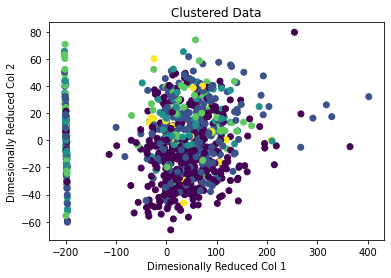

In [13]:
data = data1

X = data[['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope']]
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['num'])
plt.xlabel('Dimesionally Reduced Col 1')
plt.ylabel('Dimesionally Reduced Col 2')
plt.title('Clustered Data')
plt.show()

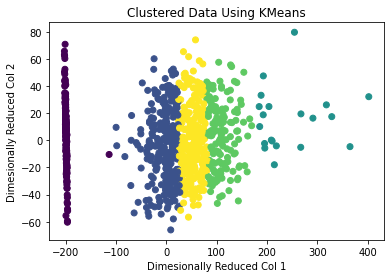

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

data = data1

X = data[['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope']]

k = 5
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

data['cluster1'] = kmeans.labels_

pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster1'])
plt.xlabel('Dimesionally Reduced Col 1')
plt.ylabel('Dimesionally Reduced Col 2')
plt.title('Clustered Data Using KMeans')
plt.show()

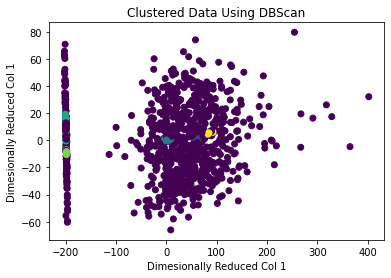

{0, 1, 2, 3, 4, -1}


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = data1

X = df[['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope']]

dbscan = DBSCAN(eps=8.2, min_samples=6)
clusters = dbscan.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.xlabel('Dimesionally Reduced Col 1')
plt.ylabel('Dimesionally Reduced Col 1')
plt.title('Clustered Data Using DBScan')
plt.show()
print(set(clusters))

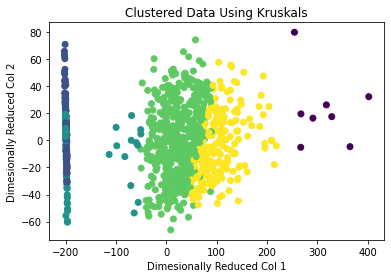

In [16]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import numpy as np
import matplotlib.pyplot as plt

# load the dataset
data=data1.drop("num",axis=1)
dist_matrix = pdist(data, metric='euclidean')

dist_sq = squareform(dist_matrix)

mst = linkage(dist_matrix, method='complete')

num_clusters = 5 
cluster_labels = fcluster(mst, t=num_clusters, criterion='maxclust')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
plt.title('Clustered Data Using Kruskals')
plt.xlabel('Dimesionally Reduced Col 1')
plt.ylabel('Dimesionally Reduced Col 2')
plt.show()

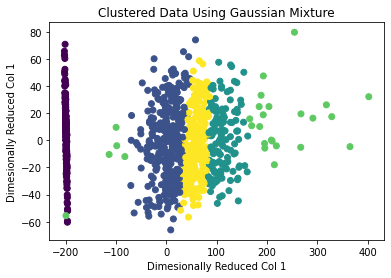

In [29]:
from sklearn.mixture import GaussianMixture
df = data1

X = df[['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope']]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

gmm = GaussianMixture(n_components=5)
clustersG = gmm.fit_predict(X_pca)



plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustersG)
plt.xlabel('Dimesionally Reduced Col 1')
plt.ylabel('Dimesionally Reduced Col 1')
plt.title('Clustered Data Using Gaussian Mixture')
plt.show()

In [31]:
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure, adjusted_rand_score
ari1 = adjusted_rand_score(data1['num'], cluster_labels)
ari2 = adjusted_rand_score(data1['num'], data['cluster1'])
ari3 = adjusted_rand_score(data1['num'], clusters)
ari4 = adjusted_rand_score(data1['num'], clustersG)

print("Adjusted Rand Index - Kruskals: {:.2f}".format(ari1))
print("Adjusted Rand Index - Kmeans {:.2f}".format(ari2))
print("Adjusted Rand Index - DBScan {:.2f}".format(ari3))
print("Adjusted Rand Index - Gaussian Mixture {:.2f}".format(ari4))

Adjusted Rand Index - Kruskals: 0.08
Adjusted Rand Index - Kmeans 0.06
Adjusted Rand Index - DBScan 0.04
Adjusted Rand Index - Gaussian Mixture 0.07
